# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

As an analyst team in the General Department of Traffic under the Ministry of Interior, we used datasets for traffic accidents in 2016 - 2017 and driving licenses issued from 1993 - 2017 to give recommendations that are best to help reduce traffic accidents and road injured in Saudi Arabia. We do this because of new traffic rules and fines were [implemented in October 2016.](http://live.saudigazette.com.sa/article/164574/New-traffic-laws-in-15-days)

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

We found one issue that the General Department of Traffic should focus on:
  - Number of accidents and road injured in Makkah, Riyadh and Eastern region have the higher level than other. This is due to the population density of these regions. Re-investigate the traffic laws of these regions, in addition to providing public transportation.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import

#### Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
accidents = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv' , sep = ';')
licenses = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep = ';')

## EDA

In [3]:
licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [4]:
accidents.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


#### 1. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:

The first dataset has infomation about the date and place of issuance of the licenses. The seconed one, talks about traffic accidents and what are the effects. Both datasets have some issues like repeated and unusful columns.  

#### 2a. How complete is the data?

Investigate missing values etc.

In [5]:
licenses.info()
licenses.isnull().sum()
# There are 25 missing values in the geo column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [6]:
accidents.info()
accidents.isnull().sum()
# There are 6 missing values in the geo column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

#### 2b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:
print(licenses.max())
print("")
print(licenses.min())

Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object


In [8]:
print(accidents.max())
print("")
print(accidents.min())

Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object


#### 3. What are your data types? 
Display the data types of each feature. 

In [9]:
licenses.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

In [10]:
accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

For both dataset, there are unuseful columns (Unnamed: 0, Unnamed: 0.1). Also, there are wronge data types such as year and value ( it should be int ).

#### 4. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [5]:
# First, remove any bad charactar in the columns that need to convert to numeric type
accidents['Year'] = accidents['Year'].apply(lambda x: x.replace('(','').replace(')',''))
accidents['Value'] = accidents['Value'].apply(lambda x: x.replace('n',''))
accidents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394"
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508"
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508"


In [6]:
licenses['Year'] = licenses['Year'].apply(lambda x: x.replace('(','').replace(')',''))
licenses['Driving Liceses'] = licenses['Driving Liceses'].apply(lambda x: x.replace('n',''))
licenses.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334"
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334"
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334"
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334"


In [7]:
# Now convert columns to numeric type
accidents[['Year', 'Value']] = accidents[['Year', 'Value']].apply(pd.to_numeric)
accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

In [8]:
licenses[['Year', 'Driving Liceses']] = licenses[['Year', 'Driving Liceses']].apply(pd.to_numeric)
licenses.dtypes

Unnamed: 0              int64
Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object

- Make new columns `x` and `y` using `geo_point_2d`

In [9]:
# making new data frame with split geo_point_2d column
tr1 = accidents["geo_point_2d"].str.split(",", n = 1, expand = True)
# making separate x column from new data frame
accidents["x"]= tr1[0]
# making separate y column from new data frame
accidents["y"]= tr1[1]
accidents

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508
...,...,...,...,...,...,...,...,...,...
79,79,79,2017,Asir,No. of Casualties - Injured,2368,"19.1387847401, 42.941470036",19.1387847401,42.941470036
80,80,80,2017,Hail,No. of Casualties - Injured,773,"27.400845724, 41.4406960508",27.400845724,41.4406960508
81,81,81,2017,Al-Baaha,No. of Casualties - Dead,134,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892
82,82,82,2017,Al-Baaha,No. of Accidents,1414,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892


In [10]:
dl1 = licenses["geo_point_2d"].str.split(",", n = 1, expand = True)
licenses["x"]= dl1[0]
licenses["y"]= dl1[1]
licenses

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334
...,...,...,...,...,...,...,...
345,345,2000,Tabouk,8473,"27.90165499, 37.2598581394",27.90165499,37.2598581394
346,346,2006,Tabouk,8259,"27.90165499, 37.2598581394",27.90165499,37.2598581394
347,347,2013,Hail,9731,"27.400845724, 41.4406960508",27.400845724,41.4406960508
348,348,1997,Hail,6606,"27.400845724, 41.4406960508",27.400845724,41.4406960508


- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
# Already did before

- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
# drop unusful column
licenses.drop(['Unnamed: 0'], axis=1,inplace=True)

In [12]:
accidents.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1,inplace=True)

- Display the data types again to confirm they are correct.

In [20]:
accidents.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
x               object
y               object
dtype: object

In [21]:
licenses.dtypes

Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
x                      object
y                      object
dtype: object

#### 5. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [13]:
licenses.rename(columns={
        'Year':'year',
        'Administritive Area':'region',
        'Driving Liceses':'driving_licenses',
        'geo_point_2d':'geo_point_2d',
        'x':'x',
        'y':'y',
    }, inplace=True)
licenses

,year,region,driving_licenses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334
...,...,...,...,...,...,...
345,2000,Tabouk,8473,"27.90165499, 37.2598581394",27.90165499,37.2598581394
346,2006,Tabouk,8259,"27.90165499, 37.2598581394",27.90165499,37.2598581394
347,2013,Hail,9731,"27.400845724, 41.4406960508",27.400845724,41.4406960508
348,1997,Hail,6606,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [14]:
accidents.rename(columns={
        'Year':'year',
        'Region':'region',
        'Indicator':'casualties',
        'Value':'value',
        'geo_point_2d':'geo_point_2d',
        'x':'x',
        'y':'y',
    }, inplace=True)
accidents

,year,region,casualties,value,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508
...,...,...,...,...,...,...,...
79,2017,Asir,No. of Casualties - Injured,2368,"19.1387847401, 42.941470036",19.1387847401,42.941470036
80,2017,Hail,No. of Casualties - Injured,773,"27.400845724, 41.4406960508",27.400845724,41.4406960508
81,2017,Al-Baaha,No. of Casualties - Dead,134,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892
82,2017,Al-Baaha,No. of Accidents,1414,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892


In [15]:
# rename the region's names to avoid any errors after merging
licenses['region'].replace({ "Eastern": "Eastern Region", "Assir": "Asir" }, inplace=True)

In [16]:
licenses['region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern Region', 'Asir',
       'Tabouk', 'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [17]:
accidents['region'].replace({ "Qassim" : "Al-Qaseem" , "Al-Baaha" : "Al-Baha" }, inplace=True)
accidents['region'].unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baha', 'Riyadh', 'Madinah',
       'Al-Qaseem', 'Najran', 'Asir'], dtype=object)

#### 6. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


### Traffic_Accidents

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|int|Traffic_Accidents|In which year the accident happened|
|**region**|object|Traffic_Accidents|In which region the accident happened|
|**casualties**|object|Traffic_Accidents|Type of casualties ( just accident - dead - injured )|
|**value**|int|Traffic_Accidents|Value of the casualty|
|**geo_point_2d**|object|Traffic_Accidents|Coordinate of the region|
|**x**|object|Traffic_Accidents|The latitude coordinate of the associated region|
|**y**|object|Traffic_Accidents|The longtitude coordinate of the associated region|

### Driving_Licenses

|<center>Feature</center>|<center>Type</center>|<center>Dataset</center>|<center>Description</center>|
|---|---|---|---|
|<center>**year**</center>|<center>int</center>|<center>Driving_Licenses</center>|<center>in what year the driving license was issued</center>|
|<center>**region**</center>|<center>object|<center>Driving_Licenses</center>|<center>In which region the driving license was issued</center>|
|<center>**driving_licenses**</center>|<center>int</center>|<center>Driving_Licenses</center>|<center>The number of driving licenses issued</center>|
|<center>**geo_point_2d**</center>|<center>object</center>|<center>Driving_Licenses</center>|<center>Coordinate of the region</center>|
|<center>**x**</center>|<center>object</center>|<center>Driving_Licenses</center>|<center>The latitude coordinate of the associated region</center>|
|<center>**y**</center>|<center>object</center>|<center>Driving_Licenses</center>|<center>The longtitude coordinate of the associated region</center>|

#### 7. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [18]:
# for driving licenses data frame 
# check how many (total) in the data frame
is_total =  licenses['region']=='Total'
region_total = licenses[is_total]
print(region_total.shape)

(25, 6)


In [19]:
# drop rows that have (total) value in region colmun
licenses.drop( licenses[ licenses['region'] == "Total" ].index , inplace=True)

In [20]:
licenses.drop(['geo_point_2d', 'x', 'y'], axis=1, inplace=True)
licenses

,year,region,driving_licenses
0,2012,Makkah,143954
1,1994,Makkah,75349
2,1998,Makkah,86082
3,2004,Makkah,86636
4,2005,Makkah,65099
...,...,...,...
345,2000,Tabouk,8473
346,2006,Tabouk,8259
347,2013,Hail,9731
348,1997,Hail,6606


In [21]:
# for accidents data frame 
# check how many (total) in the data frame
is_total =  accidents['region']=='Total'
region_total = accidents[is_total]
print(region_total.shape)

(6, 7)


In [22]:
# drop rows that have (total) value in region colmun
accidents.drop( accidents[ accidents['region'] == "Total" ].index , inplace=True)

In [23]:
accidents.drop(['geo_point_2d', 'x', 'y'], axis=1, inplace=True)
accidents

,year,region,casualties,value
0,2016,Makkah,No. of Casualties - Injured,12383
1,2016,Eastern Region,No. of Casualties - Dead,1113
2,2016,Tabouk,No. of Casualties - Dead,434
3,2016,Hail,No. of Casualties - Dead,299
4,2016,Hail,No. of Accidents,10199
...,...,...,...,...
79,2017,Asir,No. of Casualties - Injured,2368
80,2017,Hail,No. of Casualties - Injured,773
81,2017,Al-Baha,No. of Casualties - Dead,134
82,2017,Al-Baha,No. of Accidents,1414


#### 8a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

Both dataframes in long format, because they have many rows up there.

#### 8b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

The wide format would works best for both.

In [24]:
# First we define a custom function that returns a value if it exist and NaN if not
def select_item_or_nan(x):
    if len(x) >0 :
        return x
    else:
        np.nan

In [25]:
# changing dataframe to wide format
licenses_wide = pd.pivot_table(licenses, index=['region' , 'year'], values='driving_licenses', fill_value=np.nan, aggfunc= select_item_or_nan)
licenses_wide

driving_licenses
region  year                  
Al-Baha 1993              3270
        1994              2729
        1995              2423
        1996              1468
        1997              3027
...                        ...
Tabouk  2013             12848
        2014             12188
        2015               915
        2016             13610
        2017             10232

[325 rows x 1 columns]

In [26]:
# changing dataframe to wide format
accidents_wide = pd.pivot_table(accidents, index=['year', 'region'], columns='casualties', values='value', fill_value=np.nan, aggfunc= select_item_or_nan)
accidents_wide.rename(columns={
        'No. of Accidents':'no_of_accidents',
        'No. of Casualties - Dead':'no_of_deads',
        'No. of Casualties - Injured':'no_of_injured',
    }, inplace=True)
accidents_wide

casualties             no_of_accidents  no_of_deads  no_of_injured
year region                                                       
2016 Al-Baha                      3618          185           1227
     Al-Jouf                     10212          245            920
     Al-Qaseem                   25664          397           1513
     Asir                        32684          983           2541
     Eastern Region             101619         1113           4893
     Hail                        10199          299            932
     Jazan                       25873          514           2259
     Madinah                     14475          822           4184
     Makkah                     134838         2243          12383
     Najran                       3235          173            706
     Northern Boarder            13196          193            631
     Riyadh                     141736         1430           4207
     Tabouk                      16031          434           1724
2017 Al-Baha                      1414          134           1007
     Al-Jouf                     10469          240            862
     Al-Qaseem                   22405          319           1446
     Asir                        25245          828           2368
     Eastern Region              81433          963           4073
     Hail                         9379          265            773
     Jazan                       22161          466           2207
     Madinah                     16070          580           2917
     Makkah                     145541         1641          10623
     Najran                       3193          194            766
     Northern Boarder            11540          112            374
     Riyadh                      99925         1399           4540
     Tabouk                      11713          348           1243

#### 9. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [27]:
df_merge = pd.merge(licenses_wide, accidents_wide, how='outer', on=['region' , 'year'])
df_inmerge = pd.merge(licenses_wide, accidents_wide, how='inner', on=['region' , 'year'])

In [28]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 325 entries, (Al-Baha, 1993) to (Tabouk, 2017)
Data columns (total 4 columns):
driving_licenses    325 non-null int64
no_of_accidents     26 non-null float64
no_of_deads         26 non-null float64
no_of_injured       26 non-null float64
dtypes: float64(3), int64(1)
memory usage: 11.2+ KB


In [29]:
df_inmerge.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26 entries, (Al-Baha, 2016) to (Tabouk, 2017)
Data columns (total 4 columns):
driving_licenses    26 non-null int64
no_of_accidents     26 non-null int64
no_of_deads         26 non-null int64
no_of_injured       26 non-null int64
dtypes: int64(4)
memory usage: 1.1+ KB


#### 10. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [30]:
df_merge.to_csv('combined_datasets.csv')

### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [31]:
df_inmerge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
driving_licenses,26.0,62507.000000,107293.917762,2153.0,8363.25,16085.0,51222.00,495307.0
no_of_accidents,26.0,38225.692308,46493.705035,1414.0,10276.25,16050.5,30981.25,145541.0
no_of_deads,26.0,635.384615,549.783381,112.0,241.25,415.5,929.25,2243.0
no_of_injured,26.0,2743.038462,2922.641127,374.0,923.00,1618.5,3784.00,12383.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [32]:
#code
std = df_inmerge['no_of_accidents']
import math

def mean(values):
    return sum(values)/len(values)
    
def stanDev(values):
    
    #find the length of the values
    length = len(values)

    #call the mean function
    m = mean(values)

    #create a sum variable since this is not the same
    total_sum = 0

    #start a for loop going through each number in values
    for i in range(length): 

        #add the number for stan. dev. to sum
        total_sum += (values[i]-m)**2

    #return the standard deviation
    return math.sqrt(total_sum/length)

#assign a variable stan_dev to the standard deviation of the column
stan_dev = stanDev(std)

#then print the value
print(stan_dev)

45590.82869880506


In [33]:
np.std(df_inmerge)

driving_licenses    105210.342377
no_of_accidents      45590.828699
no_of_deads            539.106959
no_of_injured         2865.885411
dtype: float64

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [34]:
{df_inmerge.columns[f]:stanDev(df_inmerge[i].values) for f,i in enumerate(df_inmerge.columns)}

{'driving_licenses': 105210.34237659337,
 'no_of_accidents': 45590.82869880506,
 'no_of_deads': 539.1069593406002,
 'no_of_injured': 2865.8854113220236}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: There is a difference between manually calculated standard deviations and the output of pandas `describe` but same result in `std` method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [35]:
mask = df_merge.nlargest(10, 'driving_licenses')
mask.head(10)
# The highest number of driving licenses was in Riyadh in 2017

driving_licenses  no_of_accidents  no_of_deads  \
region         year                                                   
Riyadh         2017            495307          99925.0       1399.0   
               2016            242851         141736.0       1430.0   
               2014            194208              NaN          NaN   
               2013            165994              NaN          NaN   
Makkah         2015            157389              NaN          NaN   
Eastern Region 2011            151087              NaN          NaN   
Makkah         2014            149234              NaN          NaN   
               2012            143954              NaN          NaN   
               2017            142487         145541.0       1641.0   
Eastern Region 2016            142307         101619.0       1113.0   

                     no_of_injured  
region         year                 
Riyadh         2017         4540.0  
               2016         4207.0  
               2014            NaN  
               2013            NaN  
Makkah         2015            NaN  
Eastern Region 2011            NaN  
Makkah         2014            NaN  
               2012            NaN  
               2017        10623.0  
Eastern Region 2016         4893.0

In [36]:
df_merge.sort_values(by=['driving_licenses', 'year']).head()
# The lowest number of driving licenses was in Tabouk in 2015

driving_licenses  no_of_accidents  no_of_deads  \
region           year                                                   
Tabouk           2015               915              NaN          NaN   
Al-Baha          2007               997              NaN          NaN   
Northern Boarder 1995              1318              NaN          NaN   
                 1996              1383              NaN          NaN   
                 1994              1457              NaN          NaN   

                       no_of_injured  
region           year                 
Tabouk           2015            NaN  
Al-Baha          2007            NaN  
Northern Boarder 1995            NaN  
                 1996            NaN  
                 1994            NaN

Regarding to the results, the highest driving licenses issued were in Riyadh, Makkah and Eastern Region. For the lowest issuance, they were in Tabouk, Al-Baha and Northern Boarder.

In [37]:
df_inmerge.groupby(['region']).mean().sort_values('no_of_accidents', ascending=False).head(5)
# The highest mean of traffic accidents numbers for years (2016 - 2017) was in Makkah

,driving_licenses,no_of_accidents,no_of_deads,no_of_injured
region,,,,
Makkah,139271.0,140189.5,1942.0,11503.0
Riyadh,369079.0,120830.5,1414.5,4373.5
Eastern Region,134561.5,91526.0,1038.0,4483.0
Asir,40250.0,28964.5,905.5,2454.5
Al-Qaseem,7749.0,24034.5,358.0,1479.5


In [38]:
df_inmerge.groupby(['region']).mean().sort_values('no_of_accidents').head(5)
# The lowest mean of traffic accidents numbers for years (2016 - 2017) was in Al-Baha

,driving_licenses,no_of_accidents,no_of_deads,no_of_injured
region,,,,
Al-Baha,4372.5,2516.0,159.5,1117.0
Najran,7989.0,3214.0,183.5,736.0
Hail,38271.0,9789.0,282.0,852.5
Al-Jouf,8731.0,10340.5,242.5,891.0
Northern Boarder,5119.0,12368.0,152.5,502.5


Regarding to the results, the highest mean of traffic accidents was in Makkah and the lowest one was in Al-Baha

In [39]:
# assign a variable ss to the dataframe with groupby 'year'
ss = df_merge.groupby(['year'])

# calculate mean for each rows in the column 'driving_licenses' and add the results as a new column to the main dataframe
df_merge['mean_licenses'] = ss['driving_licenses'].transform(np.mean)

# compare between number of licenses and the mean of it
regions = df_merge[(df_merge['driving_licenses'] > df_merge['mean_licenses'])]

# print the results as a new dataframe
ff = regions.groupby(['year', 'region'])[['driving_licenses','mean_licenses']].max()
ff.sort_values('driving_licenses').head(10)

,,driving_licenses,mean_licenses
year,region,,
2005,Riyadh,23245,19323.307692
2004,Riyadh,23479,20672.153846
2002,Riyadh,25423,21695.230769
2003,Riyadh,26076,19604.461538
2010,Riyadh,31378,29731.538462
2006,Riyadh,36059,20577.538462
2007,Riyadh,36261,25488.923077
2010,Al-Qaseem,36737,29731.538462
2008,Riyadh,36798,25396.769231


In [40]:
mm = df_inmerge.groupby(['year'])
df_inmerge['mean_accidents'] = mm['no_of_accidents'].transform(np.mean)
regions = df_inmerge[(df_inmerge['no_of_accidents'] > df_inmerge['mean_accidents'])]
gg = regions.groupby(['year', 'region'])[['no_of_accidents','mean_accidents']].max()
gg.sort_values('no_of_accidents', ascending=False).head(10)

no_of_accidents  mean_accidents
year region                                         
2017 Makkah                   145541    35422.153846
2016 Riyadh                   141736    41029.230769
     Makkah                   134838    41029.230769
     Eastern Region           101619    41029.230769
2017 Riyadh                    99925    35422.153846
     Eastern Region            81433    35422.153846

In [41]:
df_inmerge.drop(columns='mean_accidents', inplace=True)

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [51]:
df_inmerge.reset_index(inplace=True)

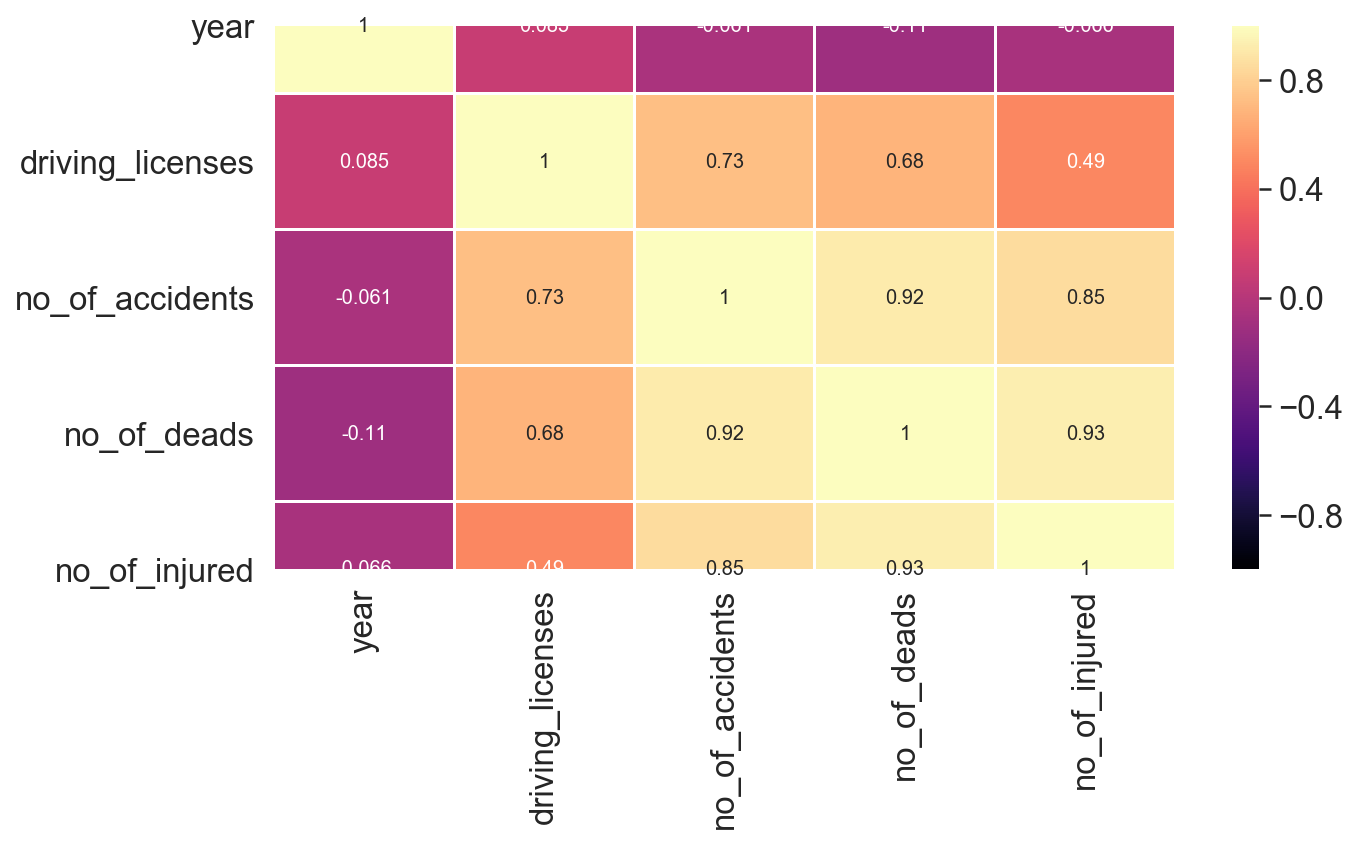

In [52]:
fig = plt.figure(figsize=(9,5))
sns.heatmap(df_inmerge.corr(), annot=True, cmap='magma', vmin=-1 , vmax=1, linewidths=1)
plt.savefig('corrolation of the dataframe', bbox_inches='tight', transparent=True, dpi='figure', quality=90)

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [53]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(17,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].set_title(list_of_titles[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

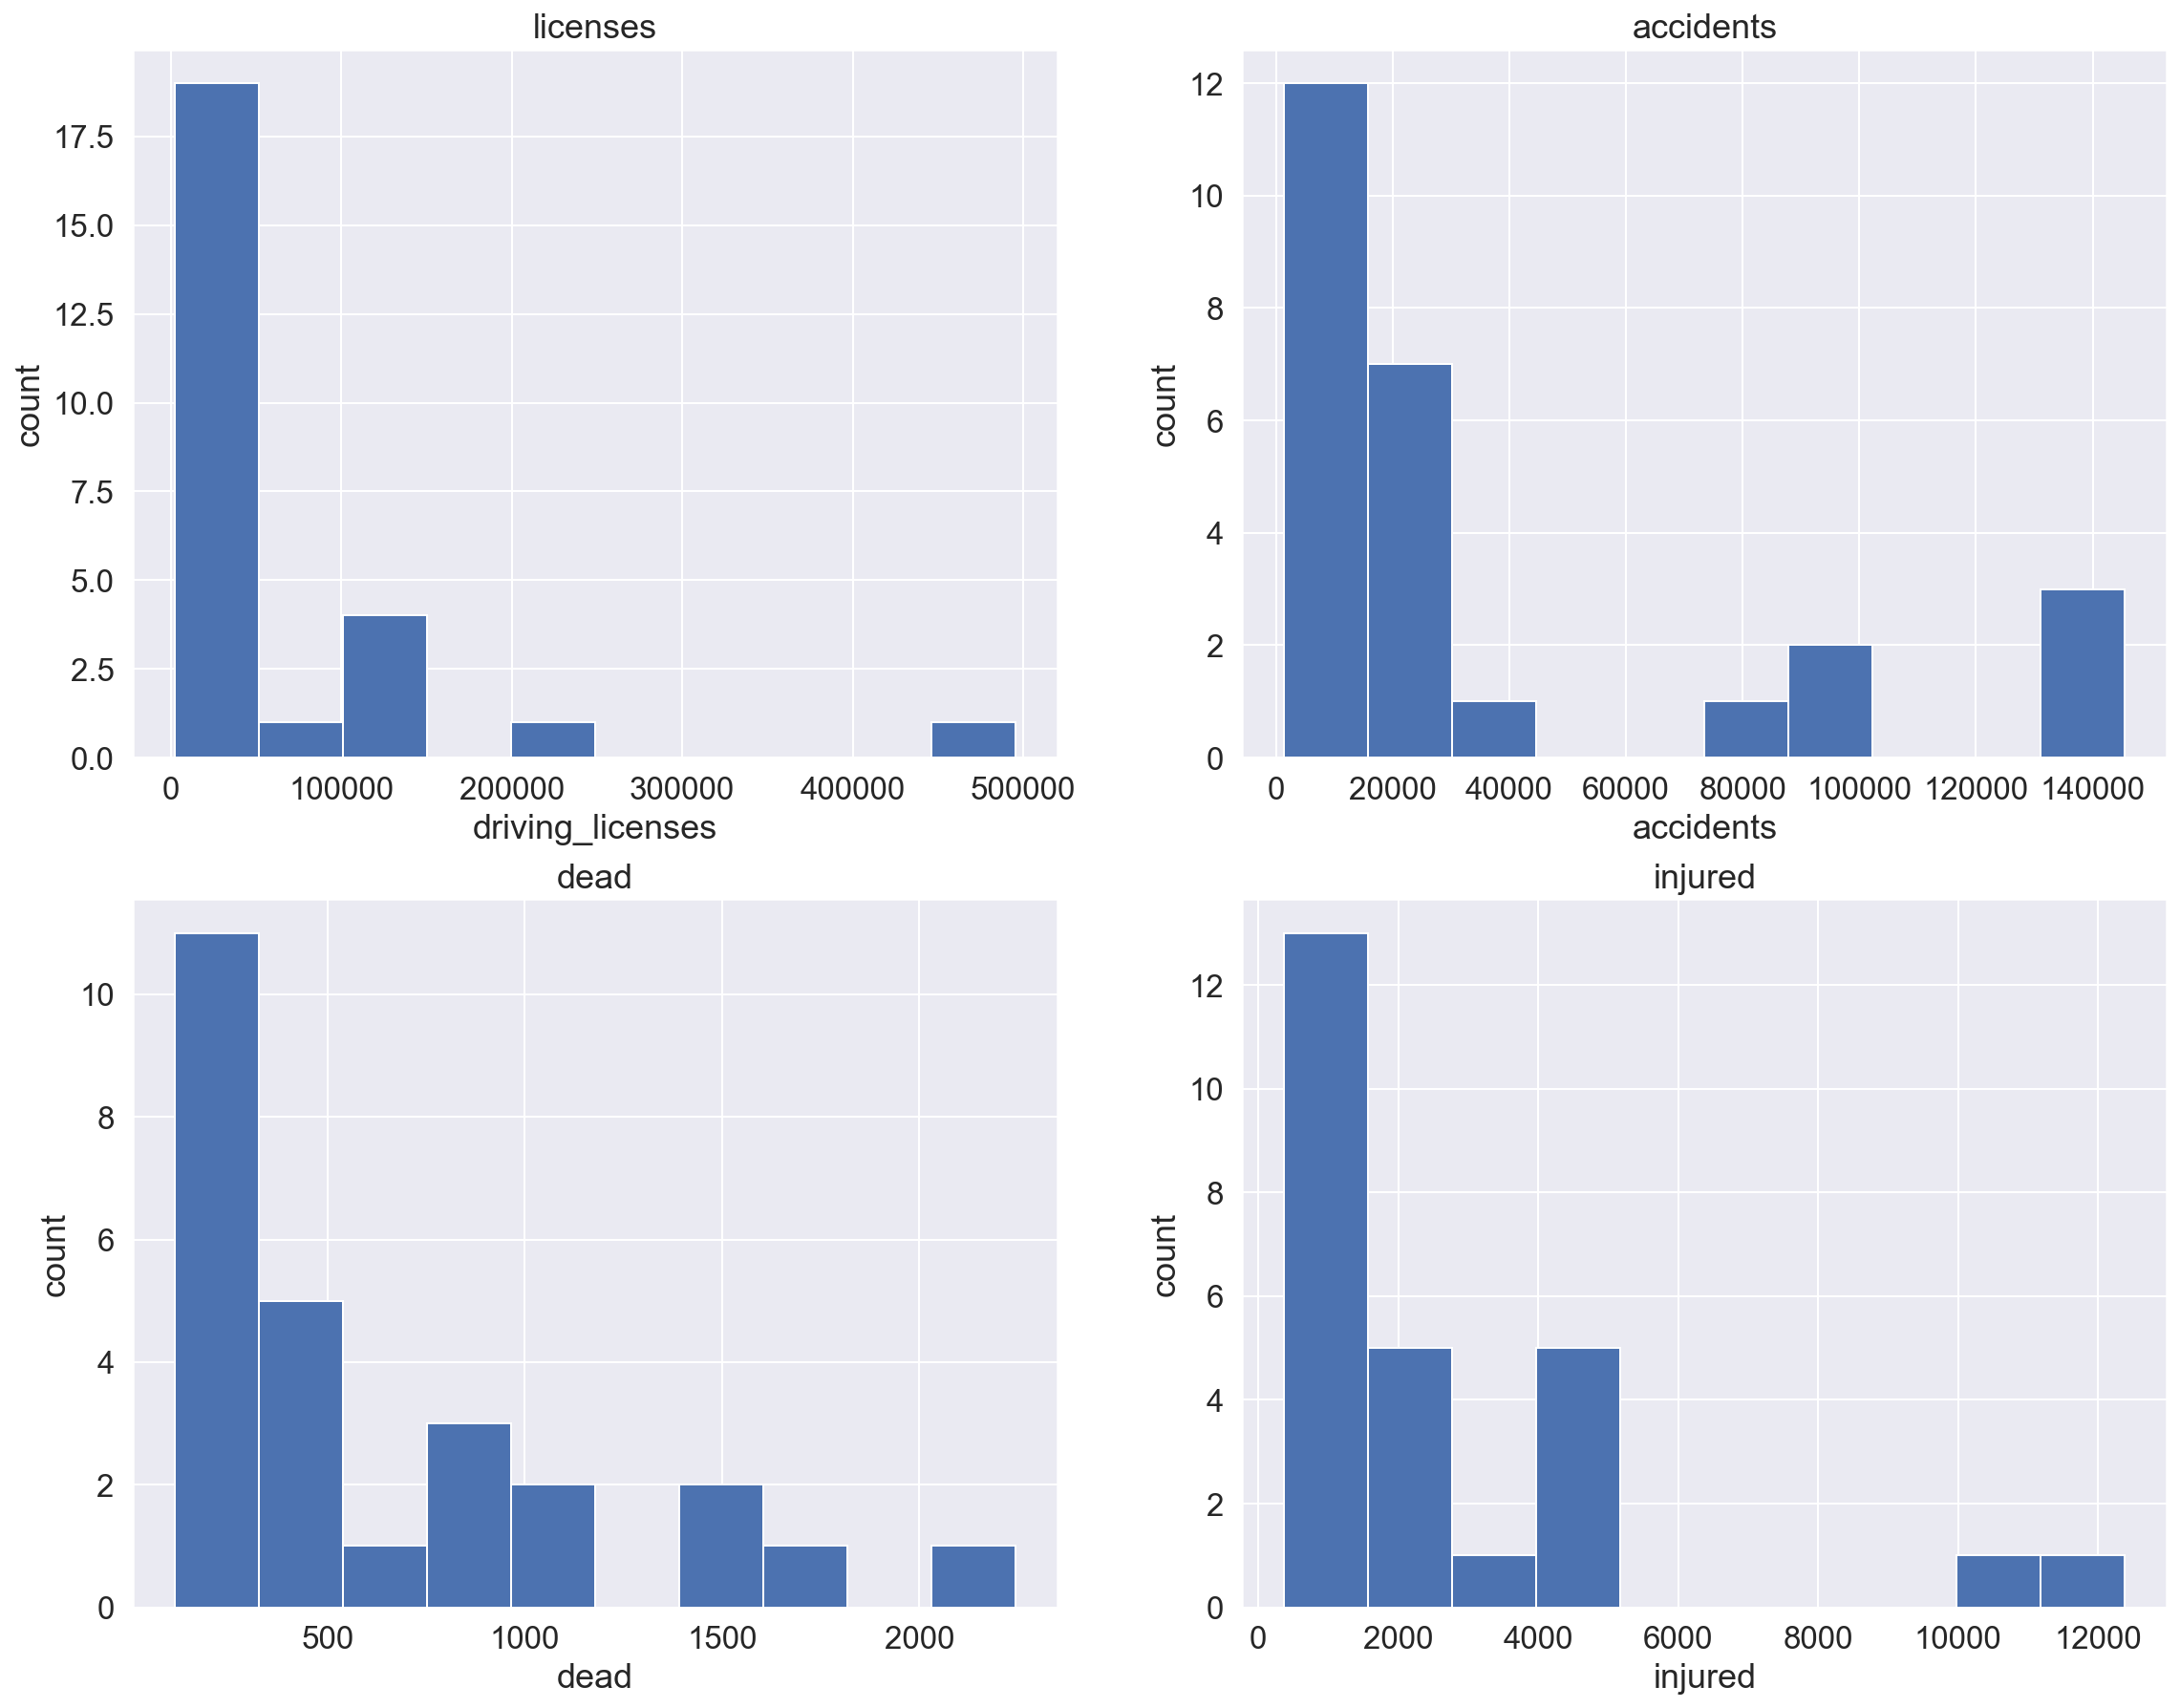

In [54]:
# Code
subplot_histograms(df_inmerge, ['driving_licenses', 'no_of_accidents', 'no_of_deads', 'no_of_injured'],
                    ['licenses', 'accidents', 'dead', 'injured'],
                    ['driving_licenses','accidents', 'dead', 'injured'],
                    ['count','count', 'count', 'count'])

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


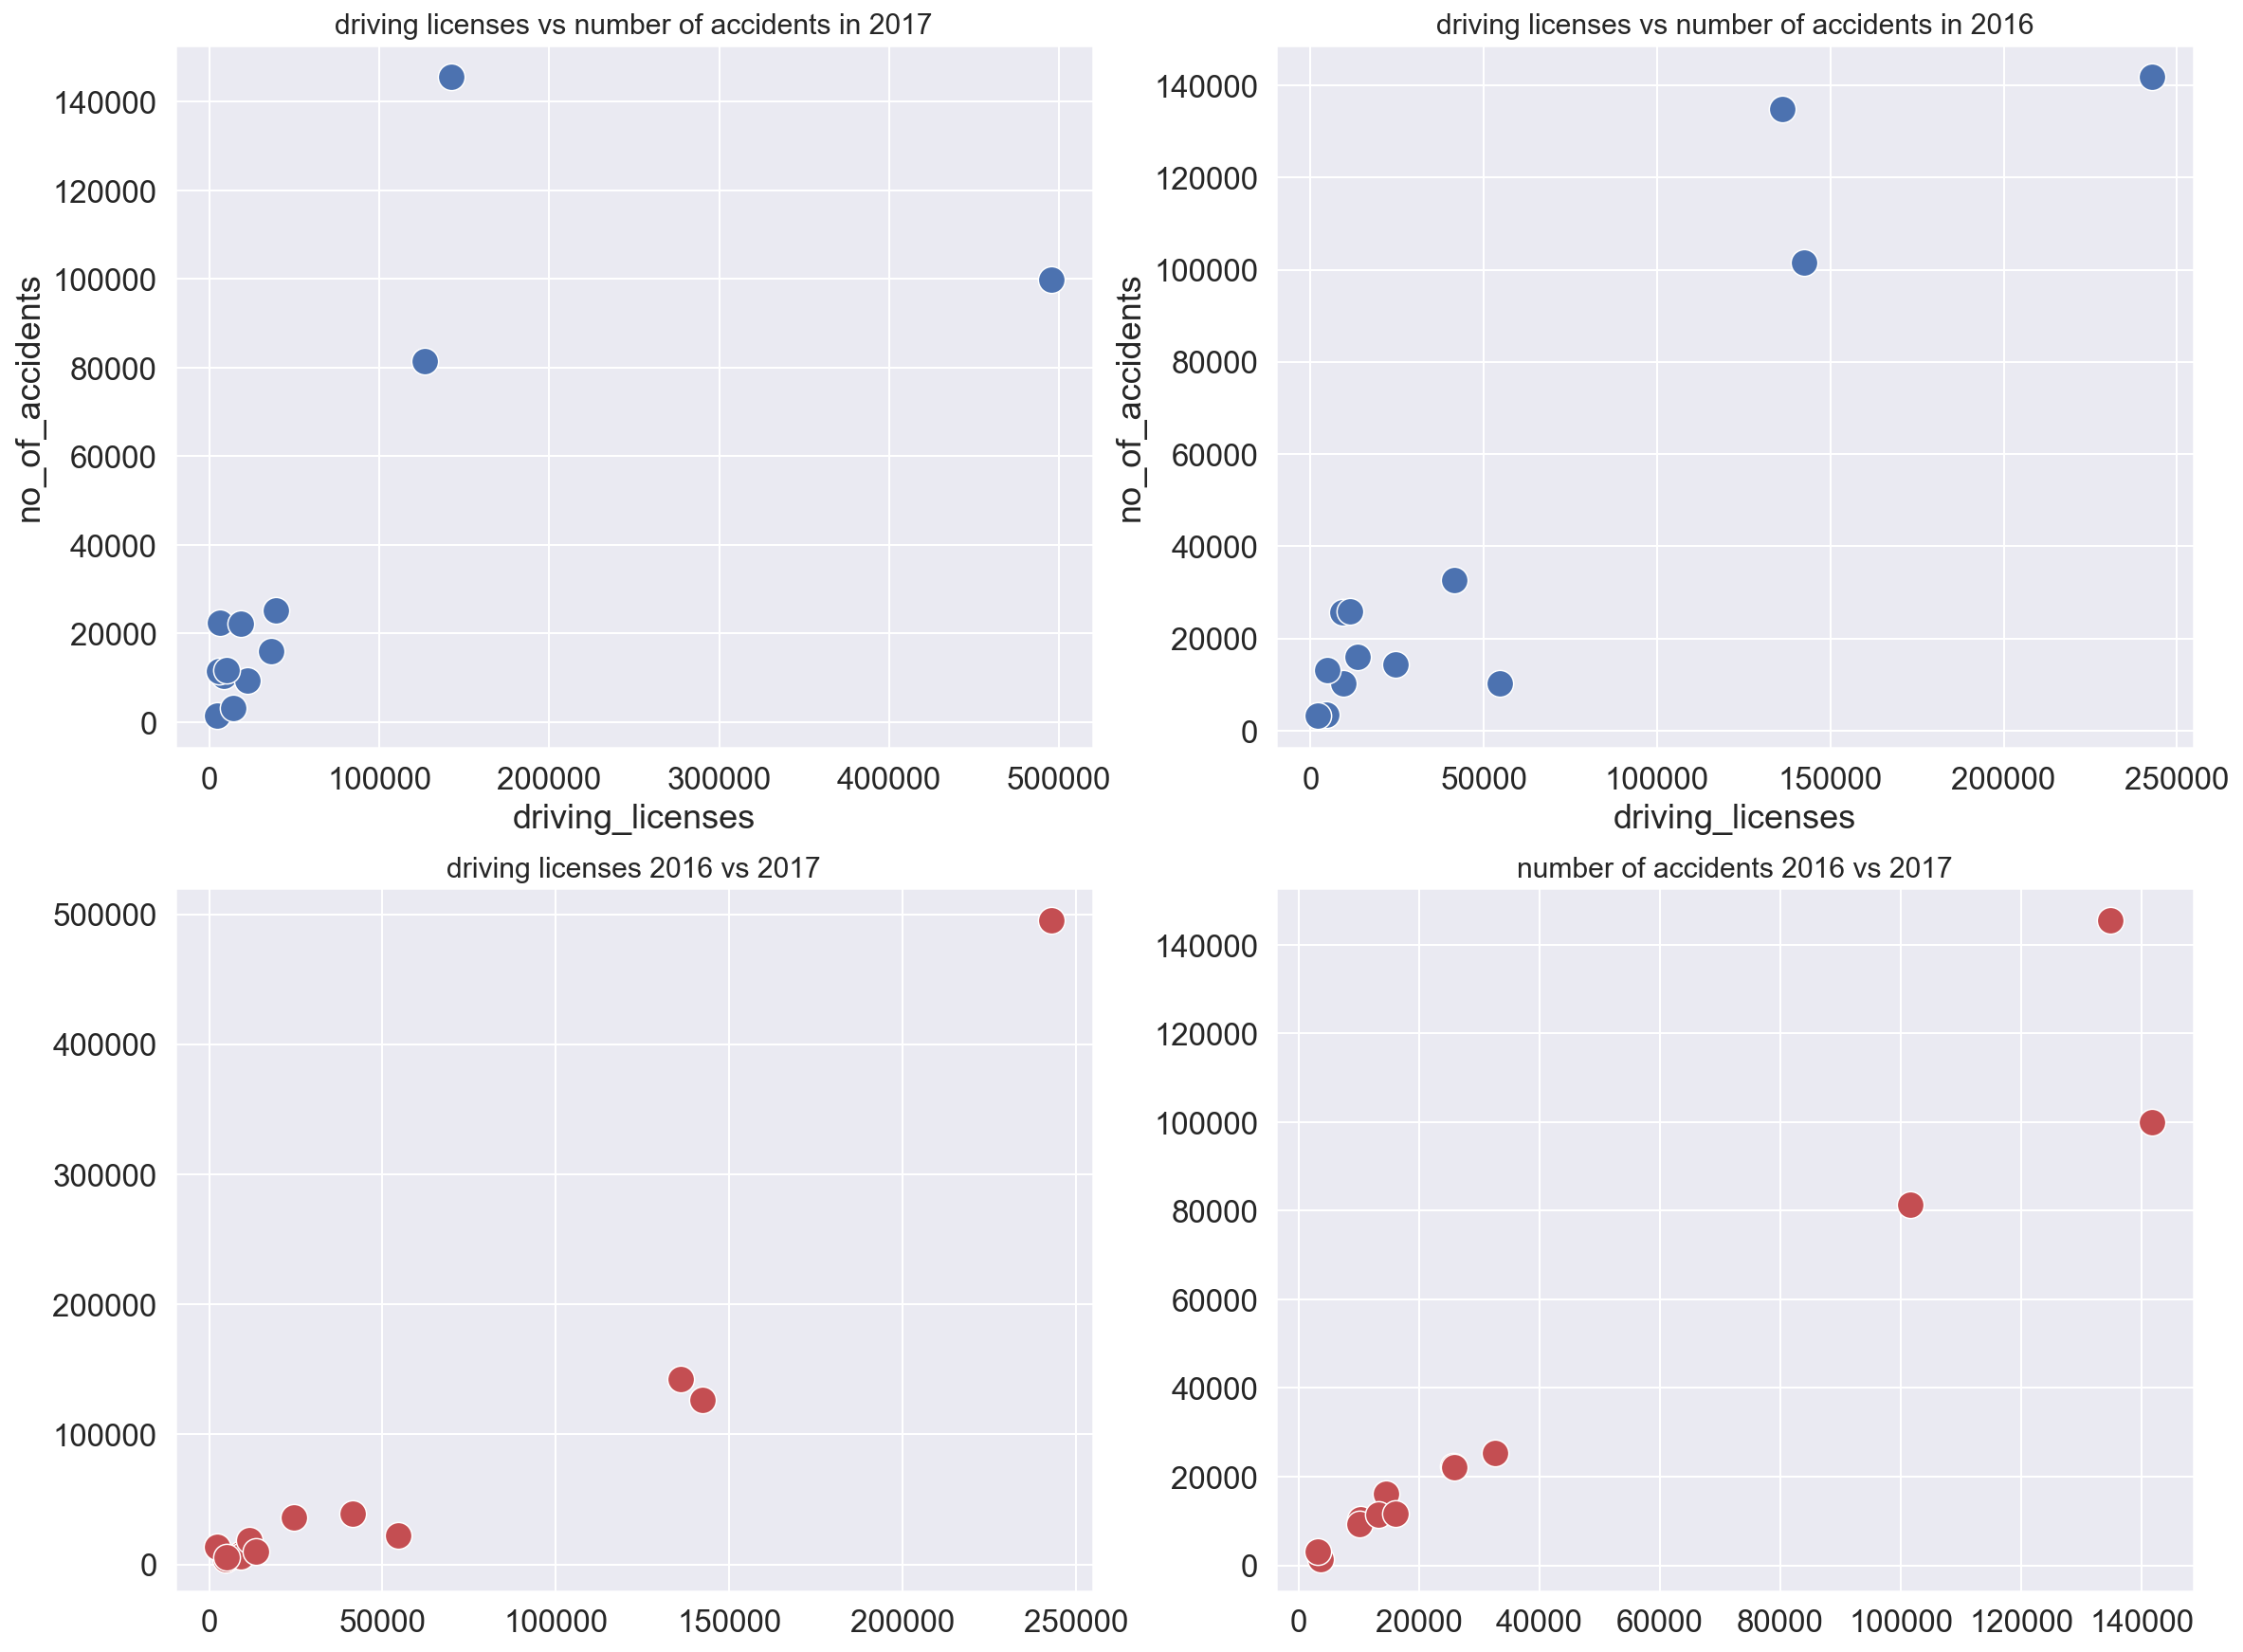

In [55]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(17, 15))
sns.scatterplot(df_inmerge.loc[df_inmerge['year'] == 2017,"driving_licenses"], df_inmerge.loc[df_inmerge['year'] == 2017, "no_of_accidents"], s=200 , ax=ax[0,0])
ax[0,0].set_title('driving licenses vs number of accidents in 2017', fontsize=15)
sns.scatterplot(df_inmerge.loc[df_inmerge['year'] == 2016,"driving_licenses"], df_inmerge.loc[df_inmerge['year'] == 2016, "no_of_accidents"], s=200, ax=ax[0,1])
ax[0,1].set_title('driving licenses vs number of accidents in 2016', fontsize=15)
sns.scatterplot(df_inmerge.loc[df_inmerge['year'] == 2016,"driving_licenses"].values, df_inmerge.loc[df_inmerge['year'] == 2017, "driving_licenses"].values,s=200 , color = "r", ax=ax[1,0])
ax[1,0].set_title('driving licenses 2016 vs 2017', fontsize=15)
sns.scatterplot(df_inmerge.loc[df_inmerge['year'] == 2016,"no_of_accidents"].values, df_inmerge.loc[df_inmerge['year'] == 2017, "no_of_accidents"].values,s=200 , color = "r", ax=ax[1,1])
ax[1,1].set_title('number of accidents 2016 vs 2017', fontsize=15)
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'Casualties')

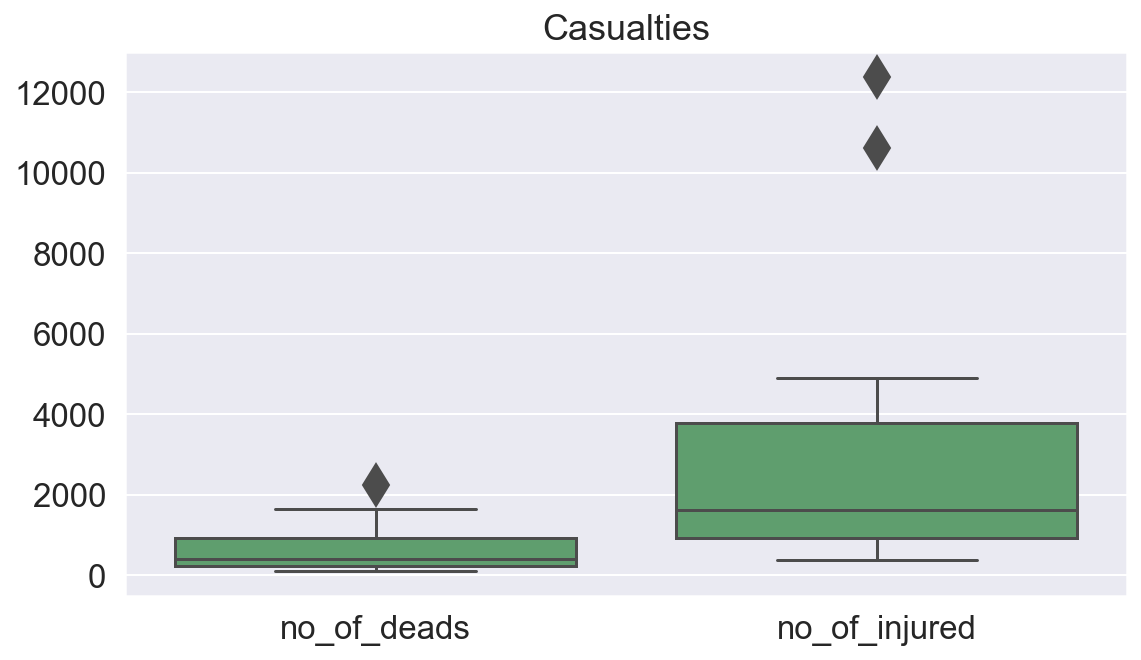

In [56]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

b = df_inmerge[['no_of_deads', 'no_of_injured']]
sns.boxplot(palette=['g'], data=b, fliersize=15)

ax.set_title("Casualties")

Text(0.5, 1.0, 'Number of Accidents vs Licenses')

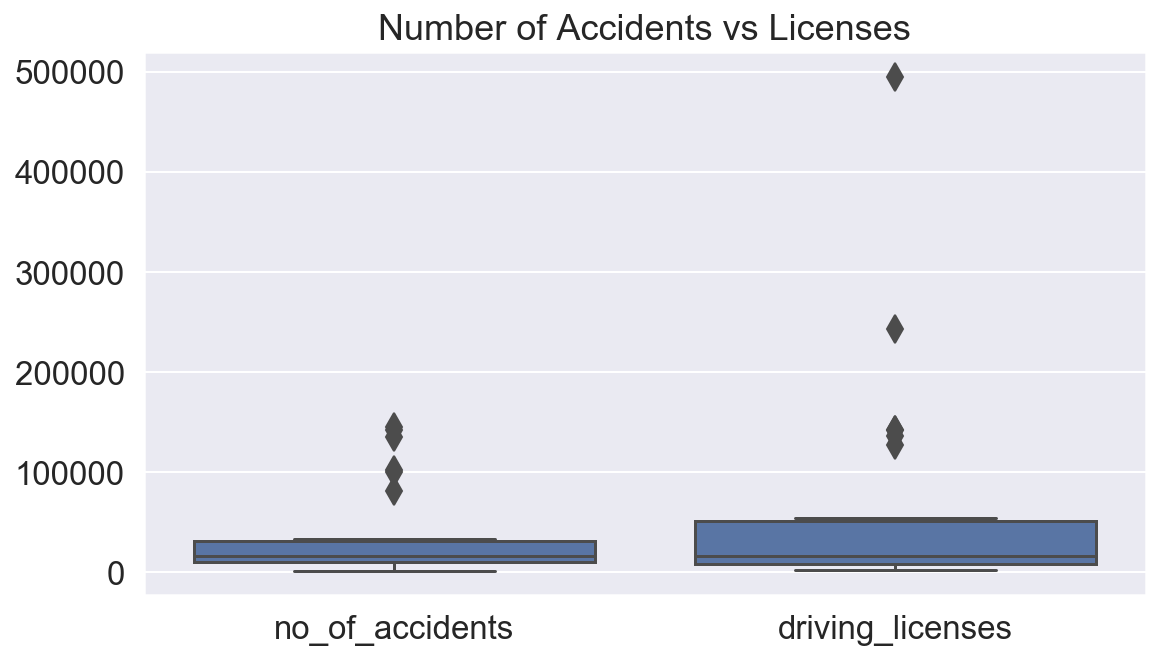

In [57]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

c = df_inmerge[['no_of_accidents', 'driving_licenses']]
sns.boxplot(palette=['b'], data=c, fliersize=10)

ax.set_title("Number of Accidents vs Licenses")

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

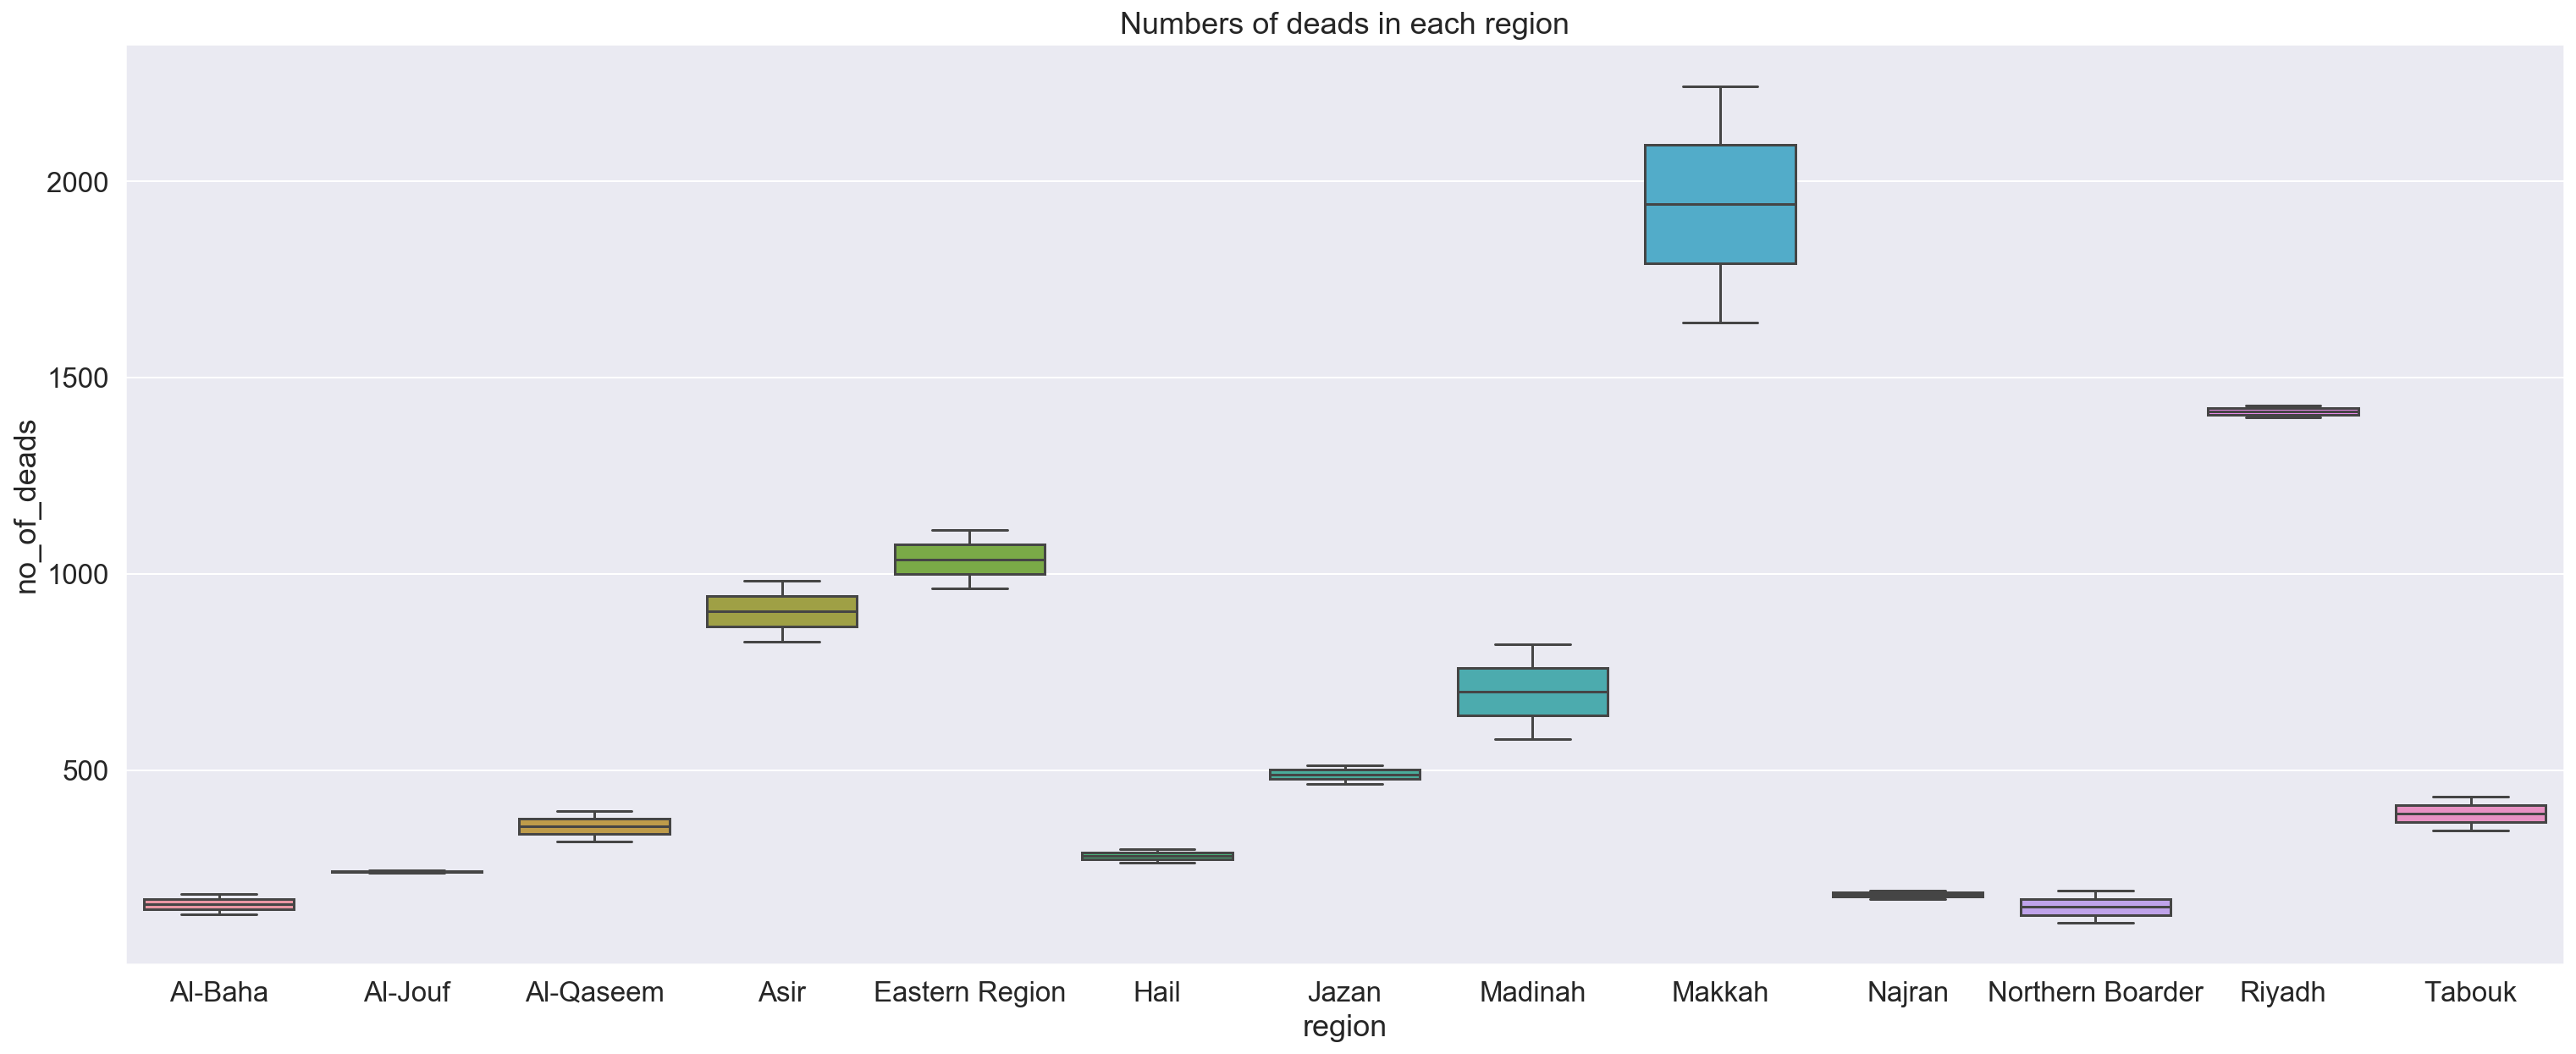

In [58]:
fig = plt.figure(figsize=(23,10))
ax = sns.boxplot( data=df_inmerge, x='region', y='no_of_deads' , fliersize=10)

ax.set_title("Numbers of deads in each region")
plt.savefig('Numbers of deads', bbox_inches='tight', transparent=True, dpi='figure', quality=90)

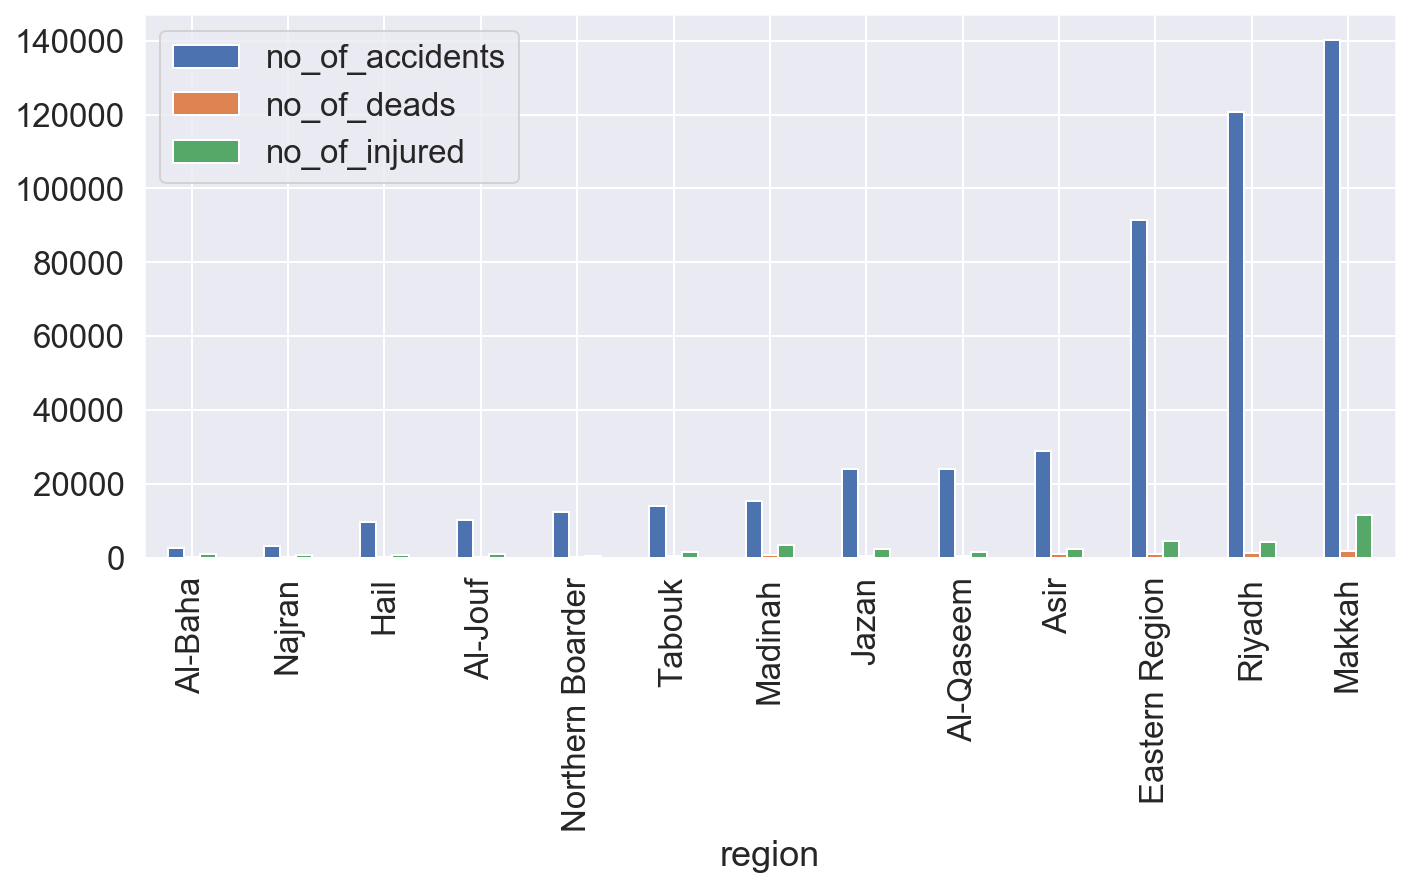

In [59]:
accidents_wide.groupby('region').mean().sort_values('no_of_accidents').plot(kind='bar', figsize=(10,5)).legend(loc=2)
plt.savefig('acc_dead_inj', bbox_inches='tight', transparent=True, dpi='figure', quality=90)

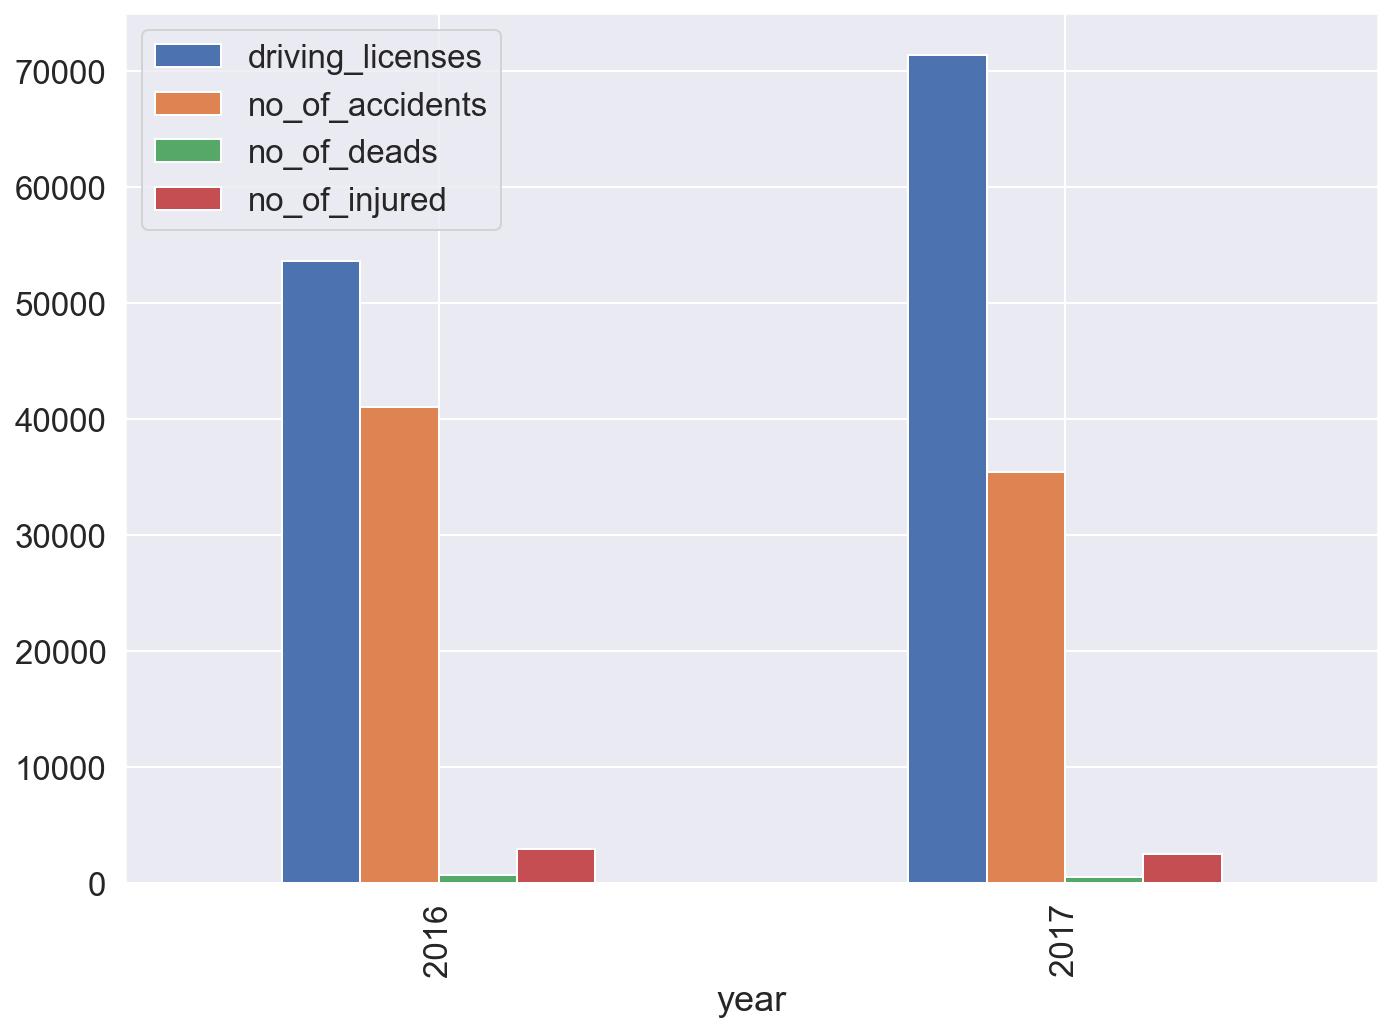

In [60]:
df_inmerge.groupby('year').mean().plot(kind='bar', figsize=(10,8)).legend(loc=2)
plt.savefig('casualties in year', bbox_inches='tight', transparent=True, dpi='figure', quality=90)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [61]:
df_inmerge.describe()

,year,driving_licenses,no_of_accidents,no_of_deads,no_of_injured
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,62507.000000,38225.692308,635.384615,2743.038462
std,0.509902,107293.917762,46493.705035,549.783381,2922.641127
min,2016.000000,2153.000000,1414.000000,112.000000,374.000000
25%,2016.000000,8363.250000,10276.250000,241.250000,923.000000
50%,2016.500000,16085.000000,16050.500000,415.500000,1618.500000
75%,2017.000000,51222.000000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,145541.000000,2243.000000,12383.000000


Answers: based on the above resultes:
  - **driving licenses** issued in Riyadh, Makkah and Eastern region have a higher number of issued than other regions. It could be the population density in those regions. So, we need population data to be sure.
  - For the rest of features ( **no_of_accidents**, **no_of_deads**, **no_of_injured** ), they have the same observation from **driving licenses** feature. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: As we see in the histogram of driving licenses and traffic accidents below, they are not normally distributed. They are postively skewed which means the mean of both datasets is higher than the median.

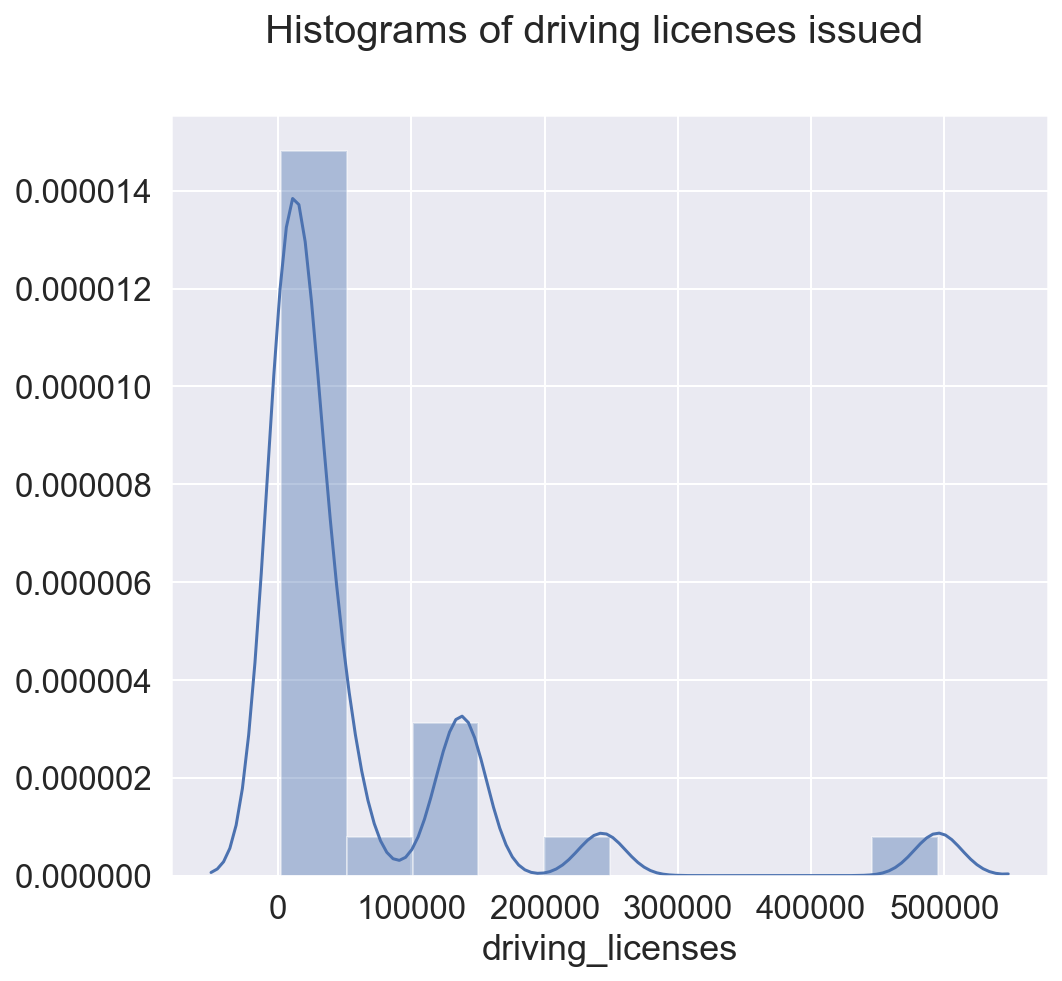

<Figure size 432x288 with 0 Axes>

In [62]:
fig = plt.figure( figsize=(7,7))
sns.distplot(df_inmerge['driving_licenses'], bins=10, kde=True)
fig.suptitle('Histograms of driving licenses issued', fontsize=20)
plt.show()
plt.savefig('Histograms of driving licenses', bbox_inches='tight', transparent=True, dpi='figure', quality=90)

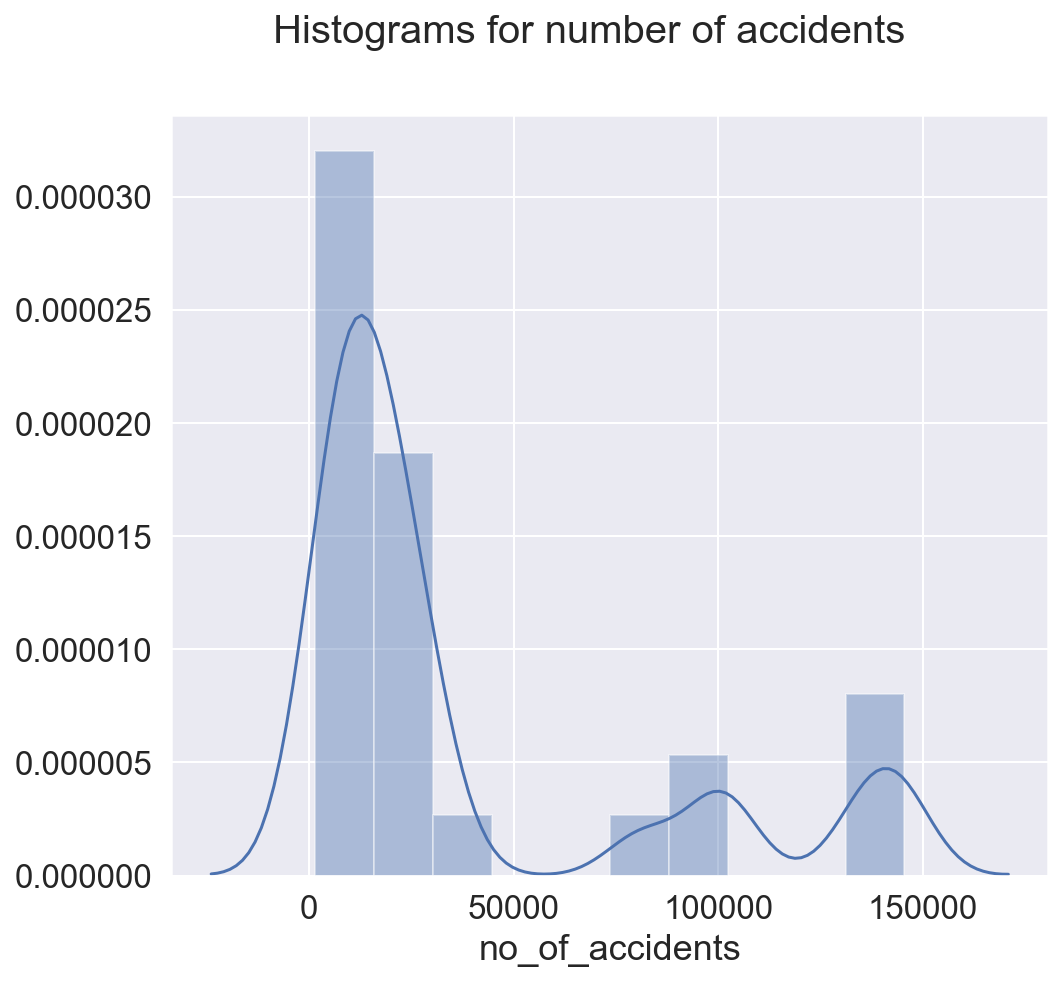

<Figure size 432x288 with 0 Axes>

In [63]:
fig = plt.figure( figsize=(7,7))
sns.distplot(df_inmerge['no_of_accidents'], bins=10, kde=True)
fig.suptitle('Histograms for number of accidents ', fontsize=20)
plt.show()
plt.savefig('Histograms for number of accidents', bbox_inches='tight', transparent=True, dpi='figure', quality=90)

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [64]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

#### Conclusions:
   Makkah, Riyadh and Eastern region have the highest level of accidents. On the other hand, Al-Baha, Najran and Northern Boarder have the lowest mean of dead. Plus, we think that increasing population density in a specific region leads to increased accidents and injuries. So, the population data will be more helpful. 

#### Recommendations:
 - Aviod driving in Riyadh, Makkah and Eastern region or places with heavy traffic, especially in rush hours and seasons.
 - Driving in Al-Baha, Najran and Northern Boarder could be more safe.
 - Must doubling the penalties for violations that cause accidents.
 - Improve road infrastructure to avoid accidents.

#### Additional data:
  - Population data is very important in our investigation to be sure about the ratio of accidents and injuerd.
  - Accidents causes data will be useful to put new penalties on the main causes of accidents.